# Week 3 assignment for Nano Energy Materials

Note: This has been shortened and will be graded leniently since it was uploaded late.

## Abstract

This assignment is test the hypothesis that CO desorption is the rate-limiting step in the reverse water gas shift reaction on copper and supported copper catalysts. In the first part, you will compute the activation energy for the reaction from temperature-dependence data (Arrhenius relationship), and in the second part you will determine the CO adsorption energy from TPD data. You will then interpret whether the results support the hypothesis. The data has been digitized from two different articles, and you are encouraged to compare your conclusion to theirs.

## Setup

We will use the packages `numpy` for math, `matplotlib` for plotting `scipy` for physical constants and differential equation solver, and `pint` for dealing with units. The first three come with the Anaconda distribution of pythin, whereas pint can be installed from the python package index:

`pip install pint`

If the following cell runs, you know you have all packages:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pint import UnitRegistry
from scipy.constants import k, N_A, h


u = UnitRegistry()
u.setup_matplotlib()
N_A = N_A * u("mol^-1")  # Avogadro's constant
k = k * u("J/K")  # Boltzmann constant
h = h * u("J * s")
R = k * N_A  # gas constant
print(R)

8.31446261815324 joule / kelvin / mole


### Arrhenius relationship

The following raw data is digitized from Figure 6 of

Posada-Pérez et al, **The following data is from Highly Active Au/δ-MoC and Cu/δ-MoC Catalysts for the Conversion of CO2: The Metal/C Ratio as a Key Factor Defining Activity, Selectivity, and Stability**. J. Am. Chem. Soc. **2016**, 138, 8269−8278


The y-axis is the rate of the reverse water gas shift reaction,

CO2 + H2 --> H2O + CO

while the x-axis is the reciprocal temperature, given in units of 1/(1000 K). An x-axis value of 2 thus corresponds to a temperature of 1000 K / 2 = 500 K.

In [2]:
x_Cu111, y_Cu111 = zip(
    [1.8991525630846815, -0.5764709213943068],
    [1.8190678193931495, 0.5411768053312053],
    [1.7383898372743292, 1.1529407656976693],
    [1.6695762706801522, 2.0823528477229916]
)
x_Cu_ZnO, y_Cu_ZnO = zip(
    [1.6677966097092292, 3.6705880705625615],
    [1.7377965988470407, 3.458823374183952],
    [1.8178813425385725, 2.8117647592089146],
    [1.8961864252591814, 1.9647059736944772],
    [1.9970339164854427, 1.4352942327479539],
)
x_Cu_MoC, y_Cu_MoC = zip(
    [1.9976271006017885, 4.352941340146173],
    [1.8979660862301044, 5.023529545345102],
    [1.820254241936784, 5.047058597023522],
    [1.7395762598179636, 5.435293873717639],
    [1.6683898209810464, 5.835294214796438]
)

To check the data, we can plot it and thus recreate that figure:

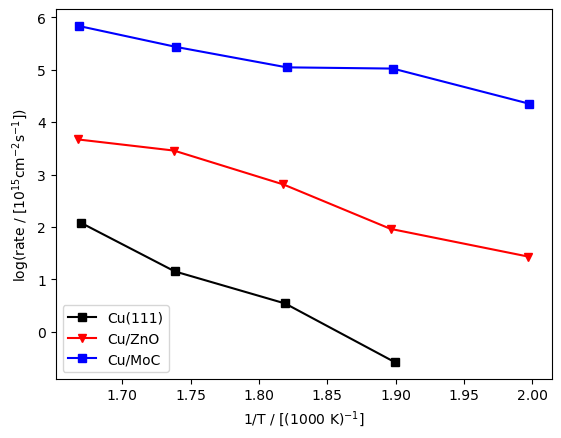

In [3]:
fig_raw, ax_raw = plt.subplots()
ax_raw.plot(x_Cu111, y_Cu111, "ks-", label="Cu(111)")
ax_raw.plot(x_Cu_ZnO, y_Cu_ZnO, "rv-", label="Cu/ZnO")
ax_raw.plot(x_Cu_MoC, y_Cu_MoC, "bs-", label="Cu/MoC")
ax_raw.set_xlabel("1/T / [(1000 K)$^{-1}$]")
ax_raw.set_ylabel("log(rate / [10$^{15}$cm$^{-2}$s$^{-1}$])")
ax_raw.legend()

We can also convert it to temperature and activity data, with units, and plot it on a linear scale like this:

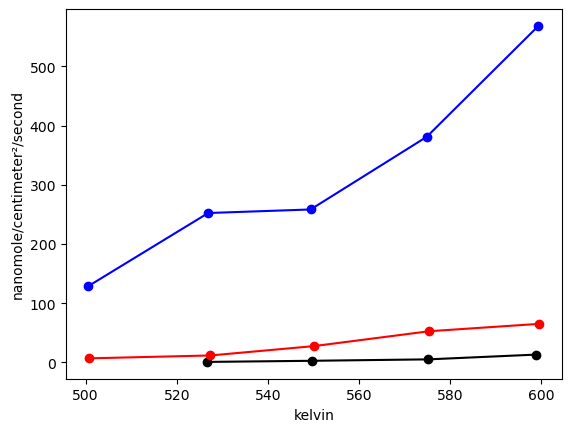

In [4]:
T_Cu111 = np.array([1000 / x for x in x_Cu111]) * u("K")
rate_Cu111 = np.exp(y_Cu111) * 1e15 * u("s^-1 cm^-2") / N_A.to("nmol^-1") 
T_Cu_ZnO = np.array([1000 / x for x in x_Cu_ZnO]) * u("K")
rate_Cu_ZnO = np.exp(y_Cu_ZnO) * 1e15 * u("s^-1 cm^-2") / N_A.to("nmol^-1") 
T_Cu_MoC = np.array([1000 / x for x in x_Cu_MoC]) * u("K")
rate_Cu_MoC = np.exp(y_Cu_MoC) * 1e15 * u("s^-1 cm^-2") / N_A.to("nmol^-1") 


fig, ax = plt.subplots()

ax.plot(T_Cu111, rate_Cu111, "o-", color="k")
ax.plot(T_Cu_ZnO, rate_Cu_ZnO, "o-", color="r")
ax.plot(T_Cu_MoC, rate_Cu_MoC, "o-", color="b")

The activation energy can be determined by the slope of the log of the rate vs one over the temperature (see Notes).

To fit the data, we'll use numpy's polyfit function, exemplified here for the Cu/MoC data:

In [5]:
# help(np.polyfit)   # run this to see info on how the function works and what arguments it can take

pfit_Cu_MoC = np.polyfit(x_Cu_MoC, y_Cu_MoC, deg=1)

slope = pfit_Cu_MoC[0] * 1 / (1000 * u("K"))**-1 # remember that raw data x was given in 1 / (1000 K)
print(f"slope: {slope}")

intercept = pfit_Cu_MoC[1]  # this is dimensionless, because it is a logarithm
print(f"intecept: {intercept}")

# the physical interpretation of the intercept is as a maximum rate, when T-->infinity
max_rate = np.exp(intercept) * 1e15 * u("cm^-2 * s^-1") / N_A.to("nmol^-1")
print(f"max_rate: {max_rate}")


slope: -4151.7110548382625 kelvin
intecept: 12.714710996196741
max_rate: 552303.6613308312 nanomole / centimeter ** 2 / second


To check this, we can put it in the Arrheneus equation and plot it with the raw data:

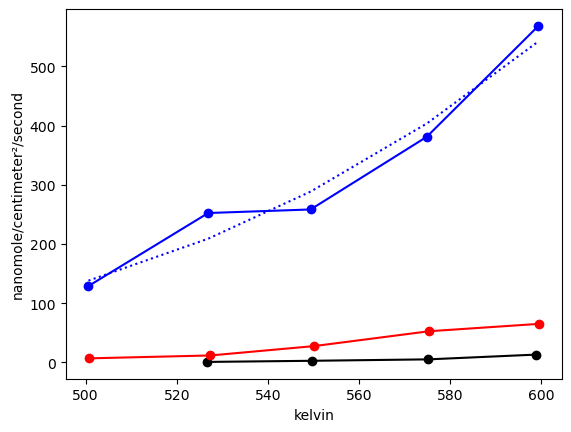

In [6]:
rate_Cu_MoC_model = max_rate * np.exp(slope / T_Cu_MoC)

ax.plot(T_Cu_MoC, rate_Cu_MoC_model, "b:", label="model rate, Cu/MoC")

fig   # looks like a fit to the data!

**Problem: Calculate the activation energy for the reverse water gas shift reaction on Cu(111) and Cu/ZnO**

**Problem: Which has the higher activation energy? Why do you think that is?**

_________.

## Temperature programmed desorption

The following data is adapted from Figure 5 (b) of

R. Naumann d’Alnoncourt, et al. **The coverage-dependent adsorption of carbon monoxide on hydrogen-reduced copper catalysts: the combined application of microcalorimetry, temperature-programmed desorption and FTIR spectroscopy**. Thermochimica Acta 434 **2005** 132–139

In [7]:
T_TPD_Cu_ZnO, y_TPD_Cu_ZnO = zip(
    [232.8330268979498, 0.0005425020715253628],
    [254.2213878843282, 0.0011934966106451155],
    [274.48404972910356, 0.0045569617738382695],
    [288.27392540634463, 0.01215190137469817],
    [295.5909891507446, 0.019638338574575327],
    [301.50093218880403, 0.02907775939181174],
    [307.1294665447796, 0.039493672017727785],
    [311.91369755858256, 0.04817360086155588],
    [316.97936301977643, 0.057179026974943856],
    [321.48218535149545, 0.062061486018342],
    [326.8292594947733, 0.062061486018342],
    [330.2063698022358, 0.05793851894835217],
    [336.1163128402953, 0.04687161178331638],
    [341.7448471962708, 0.03048825087103399],
    [347.37335578693944, 0.013236895584360541],
    [353.28329882499895, 0.004122972036684003],
    [362.0075090410462, 0.000759496940102496],
    [371.01312793917737, 0.0003254972695598764],
    [385.0844122985024, 0.00010850240098274321],
    [421.66978255111576, 0.0003254972695598764]
)
T_TPD_Cu_ZnO = np.array(T_TPD_Cu_ZnO) * u("K")  # temperature in K
y_TPD_Cu_ZnO = np.array(y_TPD_Cu_ZnO) / max(y_TPD_Cu_ZnO)  # normalized signal

The following data is adapted from Figure 1 (b) of

Diyu Zhang, et al. **Adsorption Sites in the High-Coverage Limit of CO on Cu(111)**. J. Phys. Chem. C **2025**, 129, 3493−3497

In [8]:
T_TPD_Cu111, y_TPD_Cu111 = zip(
    [124.67105613851157, 0.041257546018063224],
    [133.94736609102281, 0.05893927436815799],
    [143.81579938819885, 0.08251455243260014],
    [151.71052434239687, 0.33005874933392687],
    [156.0526357159391, 0.6719056773036012],
    [159.40789291799229, 1.2259333454744126],
    [164.93421484162613, 1.6797641932590028],
    [167.1052614935877, 2.009823212394693],
    [170.46053676525995, 2.3398822315303827],
    [173.61841951909153, 2.681728889698294],
    [179.14474144272538, 2.7642437119326573],
    [183.09210391982438, 2.322200503180288],
    [187.236840845145, 1.6856582825768764],
    [190.9868469436414, 0.9253439635228016],
    [196.51316886727523, 0.4125738413700533],
    [206.18420964661067, 0.20039310116891612],
    [217.4342098724809, 0.09430273106834752],
    [225.5263273445195, 0.029469367382315842],
    [235.19736812385497, -0.005894089317873692],
    [245.6579066960768, 0],
)

T_TPD_Cu111 = np.array(T_TPD_Cu111) * u("K")  # temperature in K
y_TPD_Cu111 = np.array(y_TPD_Cu111) / max(y_TPD_Cu111)  # normalized signal

Here, we co-plot the two datasets:

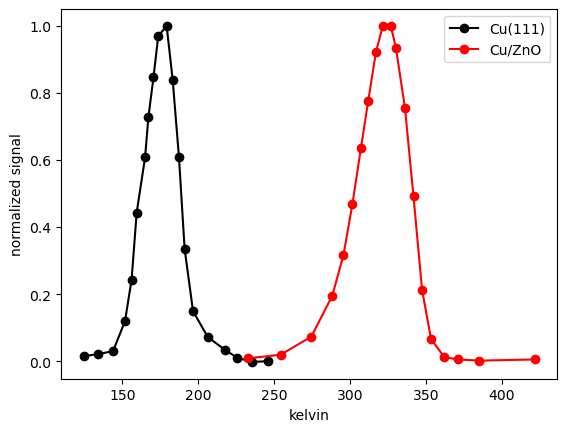

In [9]:
fig, ax = plt.subplots()
ax.plot(T_TPD_Cu111, y_TPD_Cu111, "o-", color="k", label="Cu(111)")
ax.plot(T_TPD_Cu_ZnO, y_TPD_Cu_ZnO, "o-", color="r", label="Cu/ZnO")
ax.set_ylabel("normalized signal")
ax.legend()

Problem: **Which catalyst binds CO stronger? Why do you think that is?**

_________________.

The following code simulates a TPD given a binding energy.
It assumes that the activation energy for adsorption is equal to the adsorption energy, which is to say that there is no activation barrier.
Take a look at the code and make sure you understand it!

In [10]:
def calc_signal_vs_T(
    E_ads, dTdt=1 * u("K/s"), coverage_0=1, T1=77 * u("K"), T2=400 * u("K"), timesteps=1000
):
    """Calculate a TPD curve
    
    Args:
        E_ads (quantity): The adsorption energy in [kJ/mol]
        dTdt (quantity): The temperature scan rate in [K/s]
        coverage_0 (float): The initial coverage (dimensionless)
        T1 (quantity): The initial temperature in [K]
        T2 (quantity): The final tmperature in [K]
        teimsteps (int): The number of timesteps in the simulation
    
    Return (quantity vector, quantity vector): T_vec, signal_vec,
        where T_vec is a vector of temperatures in [K] and signal_vec
        is a vector of normalized signals (dimensionless).
    """
    t_exp = (T2 - T1) / dTdt   # length of the experiment
    dt = t_exp / timesteps   # timestep
    
    def calc_rate(T, coverage):
        """Return the rate in [s^-1] given temperature and coverage"""
        rate = coverage * k * T / h * np.exp(- E_ads / (R * T))
        return rate
    
    coverage = coverage_0
    T_list = []
    signal_list = []
    for i in range(timesteps):
        # calculate the temperature for the timestep;
        t = i * dt
        T = T1 + t * dTdt
        # calculate the rate and the new coverage:
        rate = calc_rate(T=T, coverage=coverage)
        coverage = coverage - rate * dt
        
        if coverage < 0.0001:
            break  # otherwise it oscillates as the exponential part gets big :(
        
        # "save" the data (without units):
        T_list.append(T.to("K").magnitude)
        signal_list.append(rate.magnitude)
    
    # put units back on the T vector and normalize the signal vector:
    T_vec = np.array(T_list) * u("K")
    signal_vec = np.array(signal_list) / max(signal_list)
    
    return T_vec, signal_vec

The following code makes a guess at the adsorption energy (E_ads) for CO on Cu(111), simulates the TPD, and coplots it with the experimental data.

**Problem: To estimate the actual adsorption energy, change the adsorption energy to get the best possible match (it won't be perfect!) between the experimental and simulated TPD curves for Cu(111)**

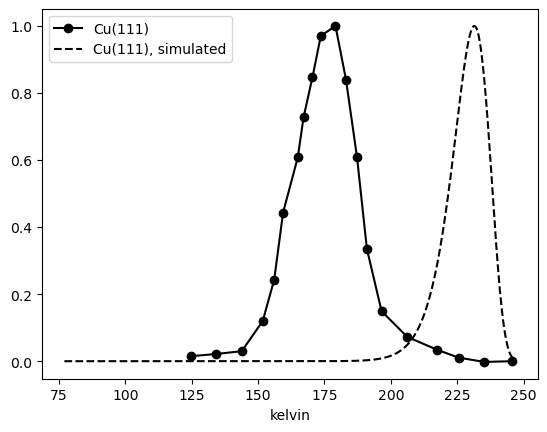

In [11]:
T_Cu111_sim, signal_Cu111_sim = calc_signal_vs_T(E_ads=60 * u("kJ/mol"))


fig, ax = plt.subplots()
ax.plot(T_TPD_Cu111, y_TPD_Cu111, "o-", color="k", label="Cu(111)")
ax.plot(T_Cu111_sim, signal_Cu111_sim, "k--", label="Cu(111), simulated")

ax.legend()

**Problem: Do the same to estimate the binding energy for Cu/ZnO**

## Conclusions

Now you have calculated activation energies for the reverse water gas shift reaction as well as adsorption energies for CO on both Cu(111) and Cu/ZnO

**Problem: Is CO adsorption the rate-limiting step for the reverse water gas shift reaction on Cu(111)? On Cu/ZnO? Why or why not?**

_________________.